<a href="https://colab.research.google.com/github/MargaritaKotova/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence-course/blob/master/CNN_for_CIFAR_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# !pip install "tensorflow>=2.0.0"
 import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [9]:
#Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170500096/170498071 [==============================] - 13s 0us/step


In [10]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [11]:
K = len(set(y_train))
print("number of classes: ", K)


number of classes:  10


In [0]:
#Build the model
i = Input(shape = x_train[0].shape) #(32, 32, 3)
#x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
#x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
#x = Conv2D(128,(3,3), strides=2, activation='relu')(x)

x = Conv2D(32,(3,3), activation='relu', padding='same')(i) #without strides, instead MaxPooling2D layer
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64,(3,3), activation='relu', padding='same')(i) 
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128,(3,3), activation='relu', padding='same')(i) 
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = GlobalMaxPooling2D()(x) #used instead of Flatten()
#x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)


In [0]:
#Compile and fit
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8693 - accuracy: 0.3144 - val_loss: 1.6188 - val_accuracy: 0.4058
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5992 - accuracy: 0.4162 - val_loss: 1.4859 - val_accuracy: 0.4607
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5057 - accuracy: 0.4539 - val_loss: 1.4241 - val_accuracy: 0.4811
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4388 - accuracy: 0.4782 - val_loss: 1.2823 - val_accuracy: 0.5493
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3769 - accuracy: 0.5048 - val_loss: 1.3290 - val_accuracy: 0.5326
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3311 - accuracy: 0.5213 - val_loss: 1.2179 - val_accuracy: 0.5593
Epoch 7/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2890 - accuracy: 0.5370 - val_loss: 1.2121 - val_ac

In [0]:
# Fit with data augmentation
# if you run this code AFTER calling the previous model.fit(), it will CONTINUE training where it left off
#batch_size = 32
#data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range = 0.1, horizontal_flip = True)
#train_generator = data_generator.flow(x_train, y_train, batch_size)
#steps_per_epoch = x_train.shape[0] // batch_size
#r = model.fit_generator(train_generator, validation_data = (x_test, y_test) , steps_per_epoch= steps_per_epoch, epochs=50)

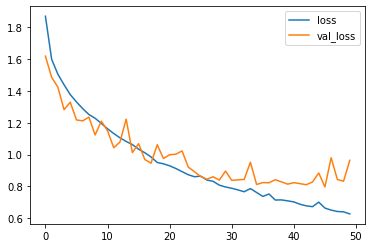

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

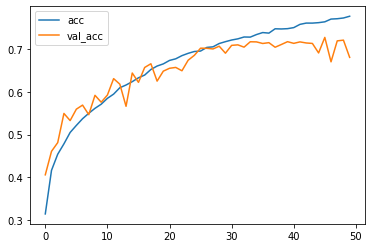

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix without  normalization
[[791   7  54   8  12   1  24   2  92   9]
 [ 46 770  10  11   0   1  14   2  63  83]
 [ 61   4 695  28  55   5 123   9  20   0]
 [ 46   6 145 449  60  52 194  13  25  10]
 [ 25   2 124  31 639   8 145  15  10   1]
 [ 24   5 113 202  78 429 111  18  19   1]
 [ 12   2  45  19  24   0 891   1   6   0]
 [ 38   3  85  48 152  38  39 579  12   6]
 [106  13  18   6   1   0   2   0 842  12]
 [ 59  80  10  10   2   2  15  10  93 719]]


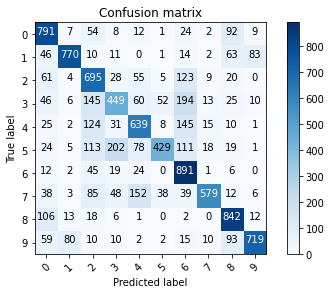

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without  normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
labels = '''airplane
automobile
bird 
cat
deer
dog 
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: deer Predicted: frog')

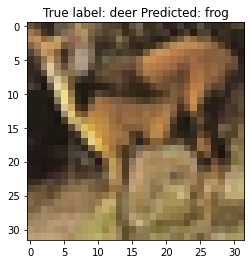

In [20]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

In [21]:
model.summary()
# 896 = 3*3*3*32 (filter size) + 32 (bias term) = 896

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
global_max_pooling2d (Global (None, 128)               0     